# Ejemplo de algoritmo de las K-medias basado en núcleos

En este ejemplo mostraremos un sencillo codigo para ilustrar el algoritmo de clustering de las K-medias basado en núcleos. El algoritmo K-means es adecuado para identificar grupos que están **separados linealmente**. En esta situación existe un hiperplano que los separa.  Sin embargo, cuando los datos **no** pueden ser separados linealmente, esto es, no se puede dibujar una recta que deje a un lado los elementos de un grupo y al otro lado los elementos del otro grupo, se debe recurrir a otro tipo de técnicas.

El algoritmo K-means con núcleos busca resolver la problemática de trabajar con grupos que no están separados linealmente. Lo que hacen es proyectar los datos en un espacio en los que los datos si estén separados linealmente y trabajar entonces con el algoritmo K-means en él.  Este espacio se denomina **espacio de características**.

Para este ejemplo utilizaremos un dataset simulado, para poder ver cómodamente el resultado de la ejecución de este tipo de algoritmos.

## Generación de datos utilizando simulación
En este ejemplo vamos a generar dos grupos que no puedan separarse de manera lineal. Para ello, haremos uso de la función *make_circles* de Scikit-learn, la cual permite generar un círculo grande que contendrá otro círculo más pequeño en dos dimensiones. Como se puede observar estos grupos no son separables.

Se han generado un total $500$ puntos. El círculo interior contendrá $250$ de ellos y el círculo exterior los otros $250$. Se establece un factor de escala de $0.2$ y se añade ruido mediante una distribución gausiana con desviación estandar de $0.1$.

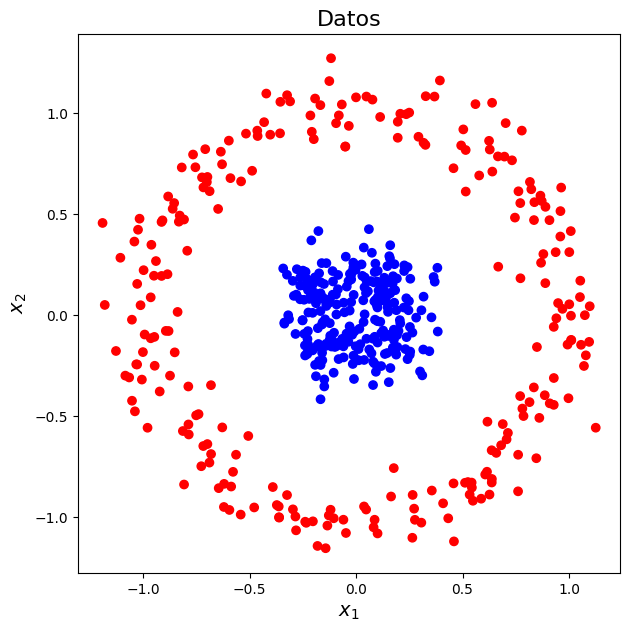

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

np.random.seed(10) # Fijamos la semilla para la reproducibilidad de los resultados
X, y = make_circles(500, factor=.2, noise=0.1)

# Dibujamos los datos simulados, elegiremos un color para cada círculo
plt.figure(figsize=(7, 7))
colors = ['r', 'b']
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y])
plt.title("Datos", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.show()

## Entrenamiento de un algoritmo K-means

En un primer paso, veremos que pasa si entrenamos un algoritmo K-means como los que hemos estudiado hasta ahora. Fijamos el número de clusters al valor verdadero, $2$.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
pred = kmeans.fit_predict(X)

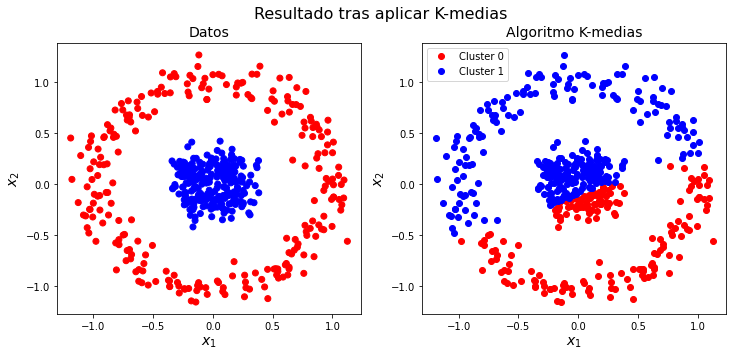

In [ ]:
# Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

colors = ['r', 'b']
ax1.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y])
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0")
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1")
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

## Entrenamiento de un algoritmo K-means basado en núcleos

Como hemos observado en el código anterior, el algorimo K-means no es adecuado para separar los dos grupos que hemos definido en este ejemplo. Parar serpar estos grupos vamos a proyectar los datos en un espacio de características.

En concreto, trabajaremos un un espacio de Hilbert con núcleo reproductor (RHKS). Estos espacios están completamente definidos por las funciones $K(x,y)$ denominadas núcleos de Mercer y el RHKS asociado a ella se denota por ${\cal H}_K$. En este ejemplo trabajaremos con un núcleo gaussiano (denominado RBF kernel), definido mediante la expresión
\begin{equation}
K(x_i,x_j)=\exp \left (-\frac{\|x_i-x_j \|^2}{\sigma^2} \right ),
\end{equation}
donde $\sigma \in \mathbb{R}$.

Notar que si $\gamma = \sigma^{-2}$, entonces la expresión será
\begin{equation}
K(x_i,x_j)=\exp \left (-\gamma \|x_i-x_j \|^2 \right ),
\end{equation}
que es la empleada por Scikit-learn.

Más información sobre los distintos kernels que ofrece la librería Scikit-learn puede encontrase en la web:
https://scikit-learn.org/stable/modules/metrics.html#metrics



In [ ]:
# Calculamos la matriz de Gram usando un núcleo Gaussiano
from sklearn.metrics.pairwise import rbf_kernel
Gram_matrix = rbf_kernel(X, gamma=1)

In [ ]:
# Realizamos el clustering utilizando la matriz de Gram
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
pred = kmeans.fit_predict(Gram_matrix)
centroides = kmeans.cluster_centers_

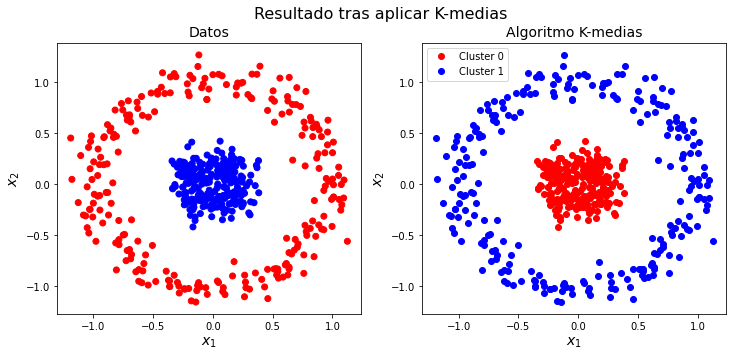

In [ ]:
# Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

colors = ['r', 'b']
ax1.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y])
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0")
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1")
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()